In [67]:
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister
from qiskit import execute, Aer
from time import time
from qiskit import IBMQ
from pprint import pprint
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [68]:
# IBMQ.enable_account('f36ee70cf2ac474adb2005ccd48f0334019d4b78c0390e7f699938dd20398139582231fd01573b4f69b162e711353c453979831799e374db64acc60c1e301b42')
# IBMQ.save_account('f36ee70cf2ac474adb2005ccd48f0334019d4b78c0390e7f699938dd20398139582231fd01573b4f69b162e711353c453979831799e374db64acc60c1e301b42', overwrite=True)

In [69]:
qbit=5
q = QuantumRegister(qbit, 'q')
c = ClassicalRegister(qbit, 'c')
circuit = QuantumCircuit(q)

# circuit.add_register(q)
all_component_lst=[q]
qbit_lst=[]
for _ in all_component_lst:
    for i in range(_.size):
        qbit_lst.append(_[i])
pprint(qbit_lst)

[(QuantumRegister(5, 'q'), 0),
 (QuantumRegister(5, 'q'), 1),
 (QuantumRegister(5, 'q'), 2),
 (QuantumRegister(5, 'q'), 3),
 (QuantumRegister(5, 'q'), 4)]


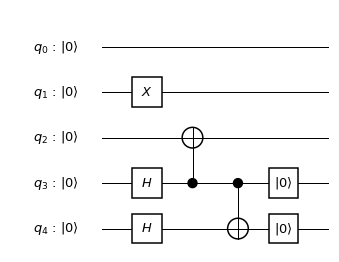

In [70]:
circuit.h(qbit_lst[3])
circuit.h(qbit_lst[4])
circuit.x(qbit_lst[1])
circuit.cx(qbit_lst[3],qbit_lst[2])
circuit.cx(qbit_lst[3],qbit_lst[4])
# circuit.reverse()
circuit.reset(qbit_lst[3])
circuit.reset(qbit_lst[4])
circuit.draw(output='mpl')

In [71]:
circuit.add_register(c)
# for _ in range(5):
#     circuit.measure(qbit_lst[_],cr[_])
circuit.measure(q,c)
print(circuit.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
creg c[5];
h q[3];
h q[4];
x q[1];
cx q[3],q[2];
cx q[3],q[4];
reset q[3];
reset q[4];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];
measure q[3] -> c[3];
measure q[4] -> c[4];



0.028841257095336914
['00010', '00110']


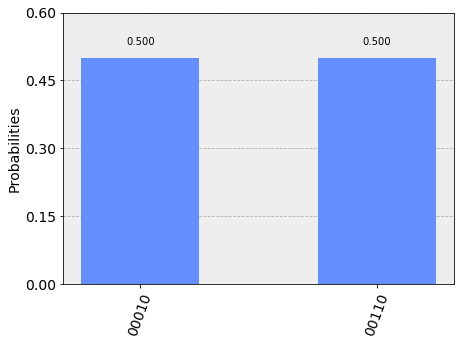

In [72]:
backend=Aer.get_backend('qasm_simulator')
start=time()
start
result=execute(circuit,backend,shots=16).result()
end=time()
print(end-start)
local_counts=result.get_counts(circuit)
all_lst=list(local_counts.keys())
print(all_lst)
plot_histogram(local_counts)

In [76]:
IBMQ.load_accounts()
print("Available backends:")
pprint(IBMQ.backends())

Available backends:
[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]


In [74]:
# backend=IBMQ.get_backend('ibmq_qasm_simulator')
# print(backend)
# shots = 16           # Number of shots to run the program (experiment); maximum is 8192 shots.
# max_credits = 3        # Maximum number of credits to spend on executions.
# start=time()
# start
# job_exp = execute(circuit, backend, shots=shots, max_credits=max_credits)
# job_monitor(job_exp)
# end=time()
# print(end-start)
# result=execute(circuit,backend,shots=16).result()
# iqs_counts=result.get_counts(circuit)
# plot_histogram(iqs_counts)

In [75]:
# backend=IBMQ.get_backend('ibmqx2')
# print(backend)
# shots = 1024           # Number of shots to run the program (experiment); maximum is 8192 shots.
# max_credits = 3        # Maximum number of credits to spend on executions.
# start=time()
# start
# job_exp = execute(circuit, backend, shots=shots, max_credits=max_credits)
# job_monitor(job_exp)
# end=time()
# print(end-start)
# result=execute(circuit,backend,shots=16).result()
# ibq_counts=result.get_counts(circuit)
# plot_histogram(iqs_counts)